# Домашнее задание № 5 (опциональное)
# Решетников Андрей 
# 397 группа

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table("/Users/Hoderu/Machine Learning/lab?5/prediction.txt")

In [2]:
data[:5]

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,*,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [3]:
data.shape

(117, 8)

In [4]:
%matplotlib inline

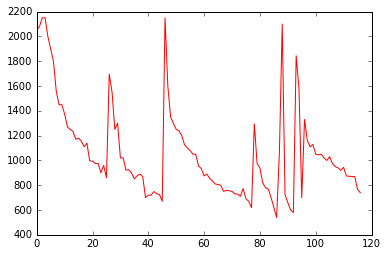

In [5]:
plt.plot(data['PRICE'], 'r')
plt.show()

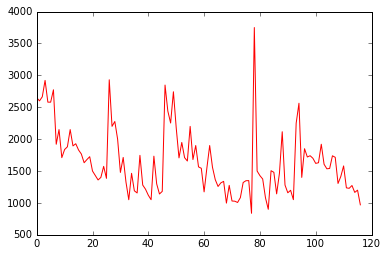

In [6]:
plt.plot(data['SQFT'], 'r')
plt.show()

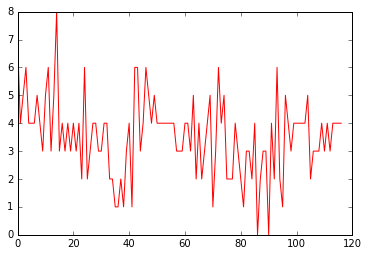

In [7]:
plt.plot(data['FEATS'], 'r')
plt.show()

Регрессоров данных - 5

In [8]:
#Кол-во данных
data.shape

(117, 8)

Пропуски в данных обозначаются *. В столбце AGE слишком много пропусков - удалим его.

In [9]:
data = data.drop('AGE', 1)

In [10]:
data[:5]

,PRICE,SQFT,FEATS,NE,CUST,COR,TAX
0,2050,2650,7,1,1,0,1639
1,2080,2600,4,1,1,0,1088
2,2150,2664,5,1,1,0,1193
3,2150,2921,6,1,1,0,1635
4,1999,2580,4,1,1,0,1732


Также удалим строчки, где нет данных в столбце TAX

In [11]:
data = data[data.TAX != '*']

In [12]:
data.shape

(107, 7)

Разделим данные на train и test выборки.

In [32]:
trainX = np.array(data[:65][list(range(0, 6))])
trainY = np.asarray(data[:65]['TAX']).ravel()
result = [int(item) for item in trainY]
trainY = np.array(result)

In [33]:
testX = np.array(data[65:][list(range(0, 6))])
testY = np.asarray(data[65:]['TAX']).ravel()
result = [int(item) for item in testY]
testY = np.array(result)

Будем подбирать параметр a

In [48]:
from sklearn.linear_model import Ridge

parameter_a = np.arange(0, 40, 0.1)
classifier = Ridge(fit_intercept=False)

trainScore = []
testScore = []
coefs = []

for a in parameter_a:
    classifier.set_params(alpha = a)
    classifier.fit(trainX, trainY)
    coefs.append(classifier.coef_)
    
    trainEstimated = classifier.predict(trainX)
    testEstimated = classifier.predict(testX)
    testScore.append(np.mean((testEstimated - testY) ** 2))
    trainScore.append(np.mean((trainEstimated - trainY) ** 2))

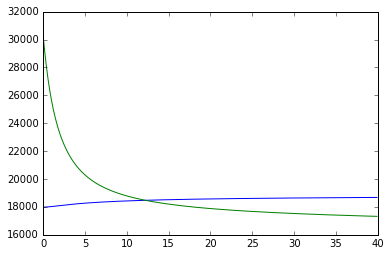

In [49]:
plt.plot(parameter_a, trainScore, 'blue')
plt.plot(parameter_a, testScore, 'green')
plt.show()

График при увеличении параметра регуляризации. Оптимальное значение 13.

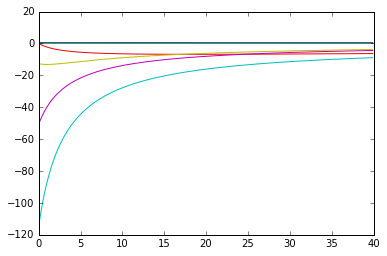

In [47]:
for i in range(6):
    plt.plot(parameter_a, np.array(coefs).transpose()[i])
plt.show()

Метод Лассо

In [57]:
from sklearn.linear_model import Lasso

parameter_a = np.arange(1, 50, 0.1)
classifier = Lasso(fit_intercept=False)

trainScore = []
testScore = []
coefs = []

for a in parameter_a:
    classifier.set_params(alpha = a)
    classifier.fit(trainX, trainY)
    coefs.append(classifier.coef_)
    
    trainEstimated = classifier.predict(trainX)
    testEstimated = classifier.predict(testX)
    trainScore.append(np.mean((trainEstimated - trainY) ** 2))
    testScore.append(np.mean((testEstimated - testY) ** 2))

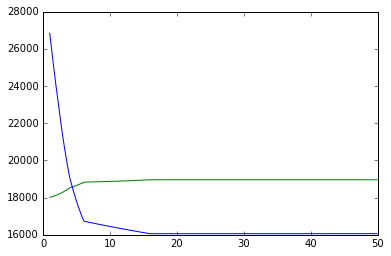

In [58]:
plt.plot(parameter_a, trainScore, 'green')
plt.plot(parameter_a, testScore, 'blue')
plt.show()

Оптимальное значение параметра 15

Веса регрессоров в зависимости от параметров регуляризации

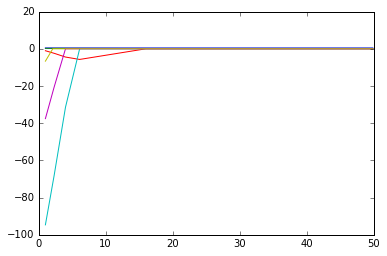

In [64]:
for i in range(6):
    plt.plot(parameter_a, np.array(coefs).transpose()[i])
plt.show()

# Оптимальные значения параметров:
# Ridge: 13
# Lasso: 15